c:\Users\Roberts\Documents\repos\Bakalaurs\DisplayGraphFunctions.py:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(epochs[max_epochs1:], accuracy_means[max_epochs1:], yerr=accuracy_stds[max_epochs1:], fmt='-o', color='blue', capsize=5, linestyle='--')
c:\Users\Roberts\Documents\repos\Bakalaurs\DisplayGraphFunctions.py:43: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(epochs[max_epochs1:], val_accuracy_means[max_epochs1:], yerr=val_accuracy_stds[max_epochs1:], fmt='-o', color='red', capsize=5, linestyle='--')


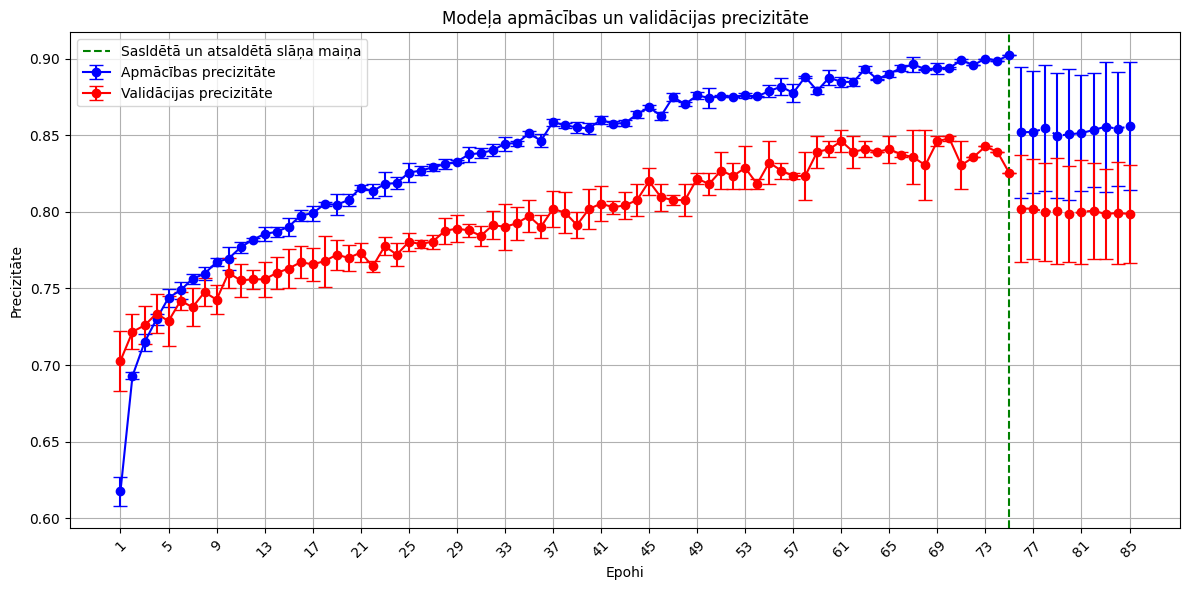

In [11]:
import DisplayGraphFunctions as gf

import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

synData = [0, 25, 50, 75, 100]
denoising = ["0.1", "0.15"]
seeds = [7921, 2048, 1337, 9876, 5624]
trainingRound = [1, 2]



data1 = gf.load_experiment_data(25, '0.1', seeds, 'results/Results_used_in_batcherosPaper', 1)
data2 = gf.load_experiment_data(25, '0.1', seeds, 'results/Results_used_in_batcherosPaper', 2)



gf.plot_accuracy_with_error(data1, data2)


In [ ]:
import os
import pandas as pd
import pickle

# Path to the directory containing the .pkl files
directory = 'results\Results_used_in_batcherosPaper'

# Initialize lists to hold the data for each denoising value and real data
data_denoising01 = []
data_denoising015 = []
data_real = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.pkl') and not filename.endswith('_1.pkl'):
        # Parse the filename to extract synthetic data percentage, seed, and denoising value if available
        parts = filename.split('_')
        synthetic_data_percent = int([part[2:] for part in parts if 'SD' in part][0])
        seed = int([part[4:] for part in parts if 'Seed' in part][0])

        denoising_parts = [part for part in parts if 'denoising' in part]
        denoising = denoising_parts[0] if denoising_parts else None

        # Load the pickle file
        with open(os.path.join(directory, filename), 'rb') as file:
            content = pickle.load(file)
            if 'test_acc' in content:
                test_acc = content['test_acc']
                
                # Check synthetic data percent and organize data into separate lists
                if synthetic_data_percent == 0:
                    data_real.append({
                        'Seed': seed,
                        'Test Accuracy': test_acc
                    })
                elif denoising == 'denoising0.1':
                    data_denoising01.append({
                        'Synthetic Data Percent': synthetic_data_percent,
                        'Seed': seed,
                        'Test Accuracy': test_acc
                    })
                elif denoising == 'denoising0.15':
                    data_denoising015.append({
                        'Synthetic Data Percent': synthetic_data_percent,
                        'Seed': seed,
                        'Test Accuracy': test_acc
                    })

# Convert the lists to DataFrames
df_denoising01 = pd.DataFrame(data_denoising01)
df_denoising015 = pd.DataFrame(data_denoising015)
df_real = pd.DataFrame(data_real)

# Sort the DataFrames for better visualization
df_denoising01.sort_values(by=['Synthetic Data Percent', 'Seed'], inplace=True)
df_denoising015.sort_values(by=['Synthetic Data Percent', 'Seed'], inplace=True)
df_real.sort_values(by='Seed', inplace=True)

def highlight_max(s):
    '''
    Highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the style to each dataframe
styled_df_denoising01 = df_denoising01.style.apply(highlight_max, subset=['Test Accuracy']).set_caption("Denoising 0.1")
styled_df_denoising015 = df_denoising015.style.apply(highlight_max, subset=['Test Accuracy']).set_caption("Denoising 0.15")
styled_df_real = df_real.style.apply(highlight_max, subset=['Test Accuracy']).set_caption("Real Data")

# Display the styled DataFrames
print("Data for Denoising 0.1:")
display(styled_df_denoising01)
print("\nData for Denoising 0.15:")
display(styled_df_denoising015)
print("\nData for Real Data Training:")
display(styled_df_real)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_real = pd.DataFrame(data_real)
df_denoising01 = pd.DataFrame(data_denoising01)
df_denoising015 = pd.DataFrame(data_denoising015)

# Calculate mean and standard error for real data and denoising data
real_mean = df_real['Test Accuracy'].mean()
real_std = df_real['Test Accuracy'].sem()

denoising01_means = df_denoising01.groupby('Synthetic Data Percent')['Test Accuracy'].mean()
denoising01_std = df_denoising01.groupby('Synthetic Data Percent')['Test Accuracy'].sem()

denoising015_means = df_denoising015.groupby('Synthetic Data Percent')['Test Accuracy'].mean()
denothing015_std = df_denoising015.groupby('Synthetic Data Percent')['Test Accuracy'].sem()

# Create a synthetic data percent array including the real data point (0%)
synthetic_data_percent = [0, 25, 50, 75, 100]

# Create accuracy and std arrays including real data
accuracy_denoising01 = [real_mean] + denoising01_means.tolist()
std_denoising01 = [real_std] + denoising01_std.tolist()

accuracy_denoising015 = [real_mean] + denoising015_means.tolist()
std_denoising015 = [real_std] + denothing015_std.tolist()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(synthetic_data_percent, accuracy_denoising01, yerr=std_denoising01, fmt='-o', capsize=5, label='Halucinācija 0.1', color='blue')
plt.errorbar(synthetic_data_percent, accuracy_denoising015, yerr=std_denoising015, fmt='-o', capsize=5, label='Halucinācija 0.15', color='red')


# Adding plot labels and legend
plt.title('Halucinācijas 0.1 un 0.15 salīdzinājums pēc apmācības procesa')
plt.xlabel('Sintētisko datu procents')
plt.ylabel('testa precizitāte (%)')
plt.legend()
plt.grid(True)
plt.xticks(synthetic_data_percent)  # Ensure x-axis ticks match our synthetic data percent categories

# Show the plot
plt.show()

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
saveLocation = 'results\Results_used_in_batcherosPaper\MobileNetV2_RD100_SD0_Seed1337_training_history_1.pkl'


with open(saveLocation, 'rb') as f:
    loaded_history = pickle.load(f)
print(loaded_history)